##Importing all the libraries

In [2]:
!pip install flask
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore
# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [4]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [6]:
#data = pd.read_csv(r'C:\Users\hp\Downloads\Traffic Prediction\\static\Train.csv')
data = pd.read_csv('static/Train.csv')



#taking the required features or columns
Collecting the data


In [7]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [8]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000, replace=True).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [9]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,258.96,1,0,18,2013,2,Clouds,few clouds
1,1,288.38,1,0,30,2016,5,Mist,mist
2,1,271.79,1,0,20,2014,1,Clouds,broken clouds
3,1,293.17,1,0,5,2016,9,Thunderstorm,proximity thunderstorm
4,1,293.02,1,0,12,2015,10,Clear,sky is clear


In [10]:
X.shape


(10000, 9)

In [11]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22


['Clouds', 'Mist', 'Thunderstorm', 'Clear', 'Haze', 'Snow', 'Rain']
['few clouds', 'mist', 'broken clouds', 'proximity thunderstorm', 'sky is clear', 'Sky is Clear', 'haze', 'overcast clouds', 'light snow', 'scattered clouds', 'light rain', 'moderate rain']


#Data Preparation

In [12]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [13]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,258.96,1,0,18,2013,2,2,2
1,1,288.38,1,0,30,2016,5,5,6
2,1,271.79,1,0,20,2014,1,2,7
3,1,293.17,1,0,5,2016,9,8,13
4,1,293.02,1,0,12,2015,10,3,5
5,1,266.08,1,0,16,2017,1,5,6


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}>
  <Axes: title={'center': 'weather_type'}>
  <Axes: title={'center': 'weather_description'}>]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

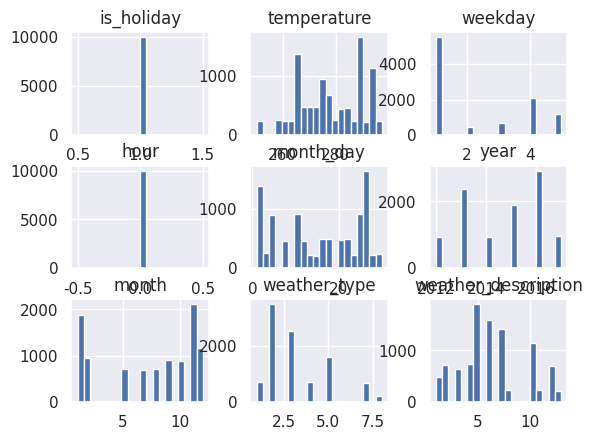

In [14]:
print(data[features].hist(bins=20,))

In [15]:
# data['traffic_volume'].hist(bins=20)

#Feature Scaling

In [16]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [17]:
print(X[:5])

[[0.         0.18654822 0.         0.         0.5862069  0.2
  0.09090909 0.14285714 0.08333333]
 [0.         0.80879865 0.         0.         1.         0.8
  0.36363636 0.57142857 0.41666667]
 [0.         0.45791032 0.         0.         0.65517241 0.4
  0.         0.14285714 0.5       ]
 [0.         0.91010998 0.         0.         0.13793103 0.8
  0.72727273 1.         1.        ]
 [0.         0.90693739 0.         0.         0.37931034 0.6
  0.81818182 0.28571429 0.33333333]]


#Visualization

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

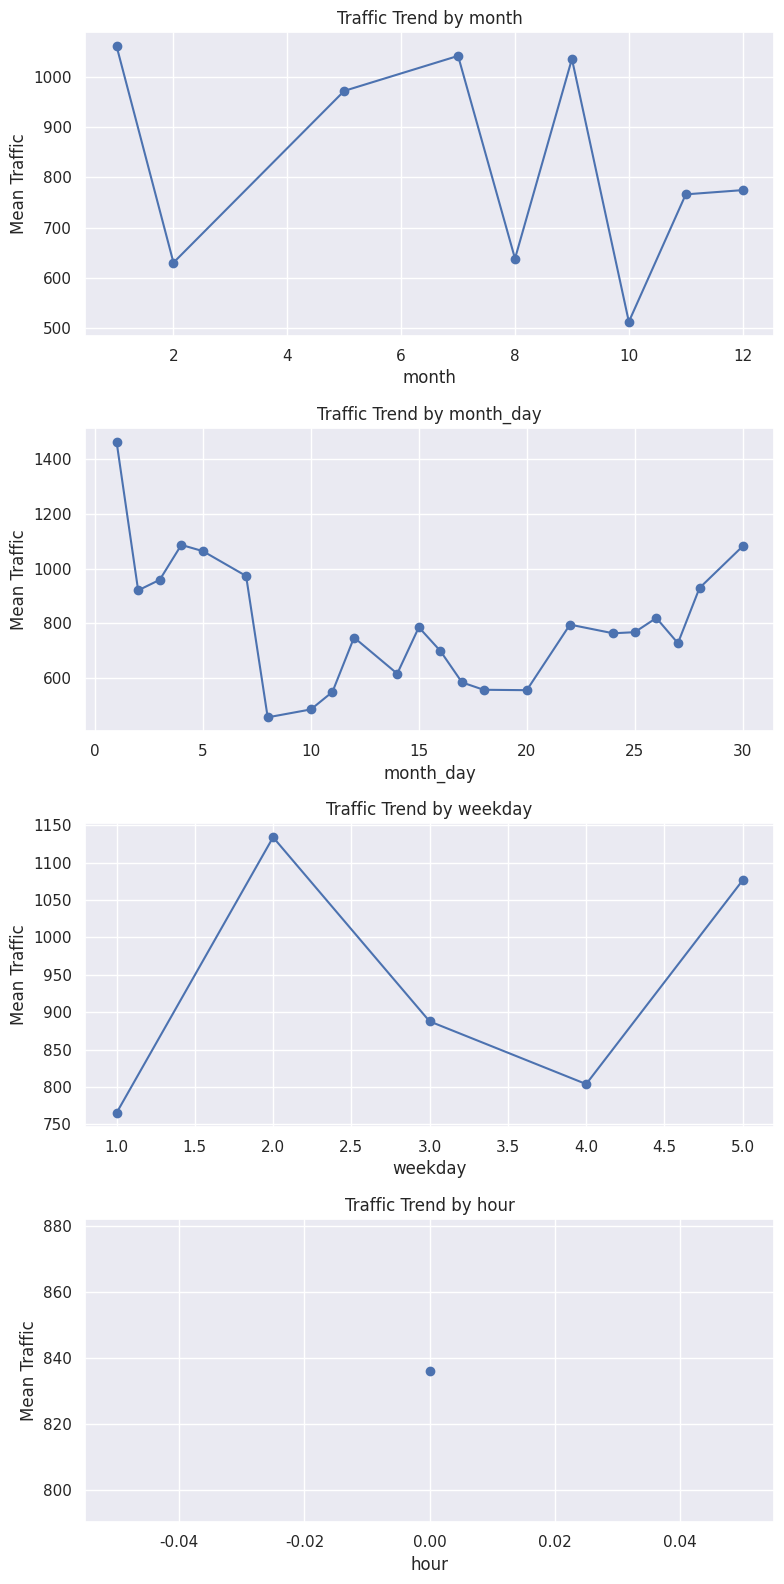

In [18]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [19]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.09310128 0.59322321 0.02757198 0.57940661 0.05775263 0.23006445
 0.9301453  0.13566216 0.34707567 0.13566216]
Actual output := [0.09546314 0.5926276  0.02362949 0.57561437 0.036862   0.22967864
 0.93005671 0.15122873 0.35727788 0.15122873]


In [20]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################

Mean Absolute Error: 0.007019751917189838


In [21]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [22]:
data[features].head(5)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,258.96,1,0,18,2013,2,2,2
1,1,288.38,1,0,30,2016,5,5,6
2,1,271.79,1,0,20,2014,1,2,7
3,1,293.17,1,0,5,2016,9,8,13
4,1,293.02,1,0,12,2015,10,3,5


#User input

In [23]:
ip=[0,89,2,288.28,1,9,2,2012,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [653.7530797]


In [24]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[692125.75832473]]


In [25]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Worst case


#Evaluating Metrics 

In [29]:
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss
# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(diff) / true.size)
#     return mbe_loss
# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss
# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss
# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss

In [31]:
# import numpy as np

# # Metric functions
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss

# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(bias_error) / true.size)
#     return mbe_loss

# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss

# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred)
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss

# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred)
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss

# # Test case
# true_values = np.array([1, 2, 3, 4, 5])
# pred_values = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

# # Print results
# print("Relative Absolute Error:", relative_absolute_error(true_values, pred_values))
# print("Mean Bias Error:", mean_bias_error(true_values, pred_values))
# print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(true_values, pred_values))
# print("Mean Squared Error:", mean_squared_error(true_values, pred_values))
# print("Root Mean Squared Error:", root_mean_squared_error(true_values, pred_values))


Relative Absolute Error: 0.1166666666666667
Mean Bias Error: 0.019999999999999928
Mean Absolute Percentage Error: 5.733333333333336
Mean Squared Error: 0.02200000000000002
Root Mean Squared Error: 0.14832396974191334
